## Making figure A2

start by importing modules, data and used priors

In [5]:
import arviz as az
import matplotlib.pylab as plt
import numpyro.distributions as dist
import h5py

from makeCorner import *

In [9]:
data_power_law_analysis = h5py.File("../data/power_law_analysis.hdf", "r")

In [7]:
new_priors = {
    "logR20":dist.Uniform(-2,1),
    "alpha_ref":dist.Normal(-2,3),
    "high_alpha":dist.Normal(-2,3),
    "width_alpha":dist.Uniform(-1,1),
    "middle_z_alpha":dist.Uniform(0,0.8),
    "mu_m1":dist.Uniform(15,60),
    "mMin":dist.Uniform(5,15),
    "high_mMin":dist.Uniform(5, 15),
    "width_mMin":dist.Uniform(-1,1),
    "middle_z_mMin":dist.Uniform(0,0.8),
    "bq":dist.Normal(0,3),
    "alpha_z":dist.Normal(0,4),
    "beta_z":dist.Uniform(0,10),
    "zp": dist.Uniform(0,4),
    "fpeak": dist.Uniform(-6,0),
    "high_f_peak": dist.Uniform(-6,0),
    "width_f_peak": dist.Uniform(-1,1),
    "middle_z_f_peak": dist.Uniform(0,0.8),
    "sig_m1": dist.Uniform(1.5,15),
    "mMax":dist.Uniform(50,100),
    "high_mMax":dist.Uniform(50, 100),
    "width_mMax":dist.Uniform(-1,1),
    "middle_z_mMax":dist.Uniform(0,0.8),
    "dmMax":dist.Uniform(0.5,1.5),
    "high_dmMax":dist.Uniform(0.5,1.5),
    "width_dmMax":dist.Uniform(-1,1),
    "middle_z_dmMax":dist.Uniform(0,0.8),
    "dmMin":dist.Uniform(-1,0.5),
    "high_dmMin":dist.Uniform(-1,0.5),
    "width_dmMin":dist.Uniform(-1,1),
    "middle_z_dmMin":dist.Uniform(0,0.8),
    "delta_f_peak":[-6, 6, 0],
}

### Making figure A2

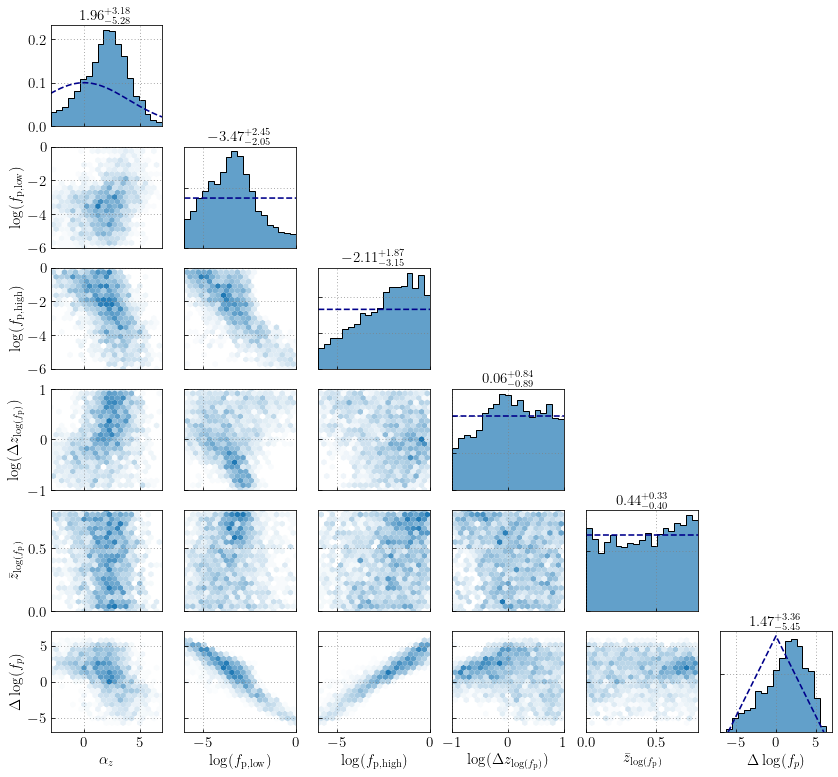

In [11]:
fig = plt.figure(figsize=(14,13))
delta_f_peak = data_power_law_analysis['posterior/log_high_f_peak'][:] - data_power_law_analysis['posterior/log_f_peak'][:]

toPlot_no_GWB_f_peak = {
    "alpha_z":{"data":data_power_law_analysis['posterior/alpha_z'],"plot_bounds":(-3,7),"label":r"$\alpha_z$"},
    "fpeak":{"data":data_power_law_analysis['posterior/log_f_peak'],"plot_bounds":(-6,0),"label":r"$\log(f_{\rm p, low})$"},
    "high_f_peak":{"data":data_power_law_analysis['posterior/log_high_f_peak'],"plot_bounds":(-6,0),"label":r"$\log(f_{\rm p, high})$"},
    "width_f_peak":{"data":np.log10(data_power_law_analysis['posterior/width_f_peak']),"plot_bounds":(-1,1),"label":r"$\log(\Delta z_{\log(f_{\rm p})})$"},
    "middle_z_f_peak":{"data":data_power_law_analysis['posterior/middle_z_f_peak'],"plot_bounds":(0,0.8),"label":r"$\bar z_{\log(f_{\rm p})}$"},
    "delta_f_peak":{"data":delta_f_peak, "plot_bounds":(-7, 7), "label":
                    r"$\Delta \log(f_p)$"
                   },
}

plot_corner(fig, toPlot_no_GWB_f_peak,"#1f78b4",labelsize=15, priors = new_priors)
plt.savefig("figure_A2.pdf", dpi = 500, bbox_inches = "tight")
plt.show()